In [16]:
import os
import numpy as np
import numpy.testing as npt
from dataclasses import dataclass, replace
from rich.progress import Progress
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegFileWriter

import jax

import jax.numpy as jnp

import micromage as mg
print(f"{mg.dtype=}")

mg.dtype=<class 'jax.numpy.float64'>


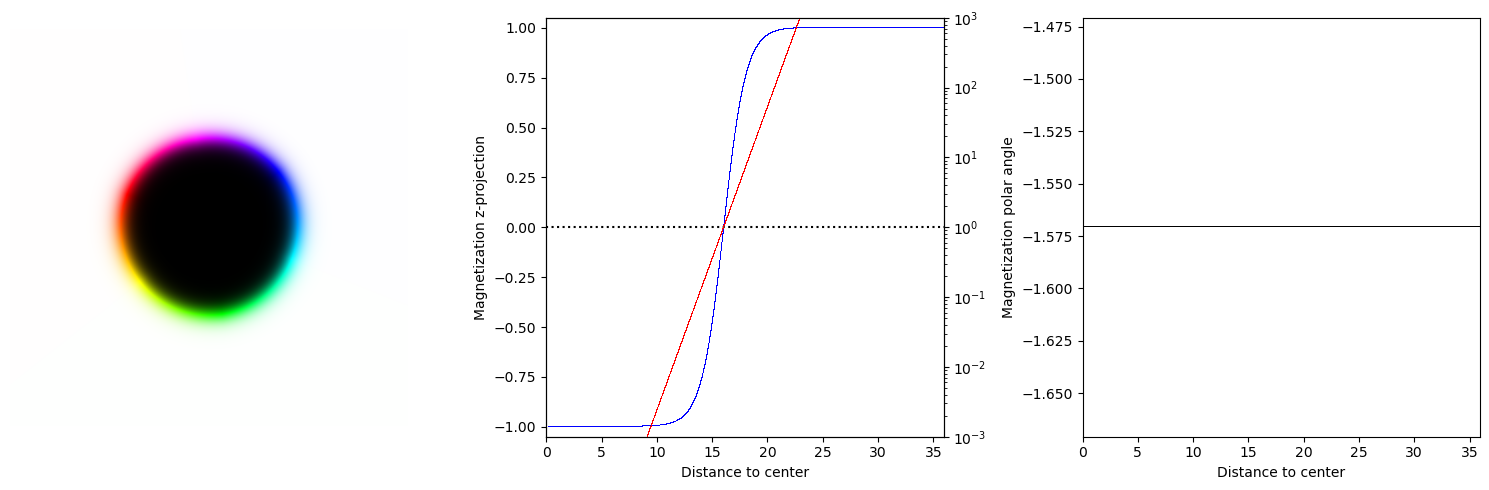

In [34]:
# Setup
system = mg.System(
    Lx=18*4, Ly=18*4, D=3.5*0, K=7.7*0, H=1*0, A=1*0,
    eta=0.2, jx=0, beta=0.,
)
comp = mg.Computer2(system)
a = mg.AnalyticA(system=system)
a.xy = comp.coordinates(600, 600)

rad0 = 4.
wdt0 = 0.5
s = 4
p0 = jnp.array([system.Lx/2,system.Ly/2,rad0*s,wdt0*s,-np.pi/2,0,0.0])

mg.analyze_geometry(a(p0), a.xy);

In [35]:
a.system = comp.system = replace(system, A=1)
print("Heisenberg exchange energy")
print("Numeric            Analytic")
for s in np.linspace(1, 4, 4): 
    p0 = jnp.array([system.Lx/2,system.Ly/2,rad0*s,wdt0*s,-np.pi/2,0,0.0])
    n = a(p0)
    print(f"{comp.energy(n)} {a.energy(p0)}")


Heisenberg exchange energy
Numeric            Analytic
102.11233276182026 102.1231994231621
102.1226774500057 102.1231994231621
102.12324306909494 102.1231994231621
102.12334850287101 102.1231994231621


In [36]:
a.system = comp.system = replace(system, D=3.5)
print("DMI exchange energy")
print("Numeric            Analytic")
for s in np.linspace(1, 4, 4): 
    p0 = jnp.array([system.Lx/2,system.Ly/2,rad0*s,wdt0*s,-np.pi/2,0,0.0])
    n = a(p0)
    print(f"{comp.energy(n)/s} {a.energy(p0)/s}")

DMI exchange energy
Numeric            Analytic
-276.3260667028894 -276.348923230502
-276.3474745945434 -276.348923230502
-276.3486422922121 -276.34892323050207
-276.3488395334922 -276.348923230502


In [37]:
a.system = comp.system = replace(system, K=7.7)
print("Anisotropy energy")
print("Numeric            Analytic")
for s in np.linspace(1, 4, 4): 
    p0 = jnp.array([system.Lx/2,system.Ly/2,rad0*s,wdt0*s,-np.pi/2,0,0.0])
    n = a(p0)
    print(f"{comp.energy(n)/s**2} {a.energy(p0)/s**2}")

Anisotropy energy
Numeric            Analytic
193.53037334258073 193.52210746113127
193.52238138544737 193.52210746113127
193.52194641570242 193.52210746113124
193.5218727284067 193.52210746113127


In [38]:
a.system = comp.system = replace(system, H=1)
print("Zeeman energy")
print("Numeric            Analytic")
for s in np.linspace(1, 4, 4): 
    p0 = jnp.array([system.Lx/2,system.Ly/2,rad0*s,wdt0*s,-np.pi/2,0,0.0])
    n = a(p0)
    print(f"{comp.energy(n)/s**2} {a.energy(p0)/s**2}")

Zeeman energy
Numeric            Analytic
101.82291019721403 101.82289310988588
101.8229101938056 101.82289310988588
101.82291019380553 101.82289310988588
101.82291017793561 101.82289310988588
